### Main libraries

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import seaborn as sns

In [205]:
%matplotlib inline

In [206]:
import warnings
warnings.filterwarnings('ignore')

### Simple Model

In [207]:
price4 = pd.read_csv('agrodata.csv')
price4.head()

,Date,Price
0,02/01/2020,74
1,03/01/2020,81
2,04/01/2020,77
3,07/01/2020,73
4,08/01/2020,67


In [208]:
price4['Date'] = pd.to_datetime(price4['Date'], format = '%d/%m/%Y')
price4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    988 non-null    datetime64[ns]
 1   Price   988 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.6 KB


In [209]:
weather4 = pd.read_csv('agroweather_data.csv')
weather4.head()

,Unnamed: 0,fecha,dia,tempMedia,tempMax,horMinTempMax,tempMin,horMinTempMin,humedadMedia,humedadMax,...,velViento,dirViento,velVientoMax,horMinVelMax,dirVientoVelMax,radiacion,precipitacion,bateria,fechaUtlMod,et0
0,0,2020-01-01,1,11.28,16.30,13:26,8.07,06:28,76.80,88.3,...,1.742,346.500,4.606,02:20,347.600,10.990,0.0,12.88,2020-01-03T07:45:00.000+0100,1.343917
1,1,2020-01-02,2,12.19,15.32,12:32,10.39,17:56,75.70,85.6,...,1.473,359.600,3.998,05:23,0.000,7.060,0.0,12.87,2020-01-04T07:45:00.000+0100,1.199930
2,2,2020-01-03,3,11.77,16.18,13:36,7.94,06:58,77.80,86.8,...,2.111,326.300,4.302,03:35,337.000,9.860,0.0,12.86,2020-01-05T07:45:00.000+0100,1.397516
3,3,2020-01-04,4,12.79,16.79,11:40,9.00,04:20,72.60,86.2,...,1.699,40.730,4.439,01:56,0.095,6.104,0.0,12.87,2020-01-06T07:45:00.000+0100,1.374706
4,4,2020-01-05,5,11.85,17.18,11:36,8.60,00:00,69.21,82.5,...,1.863,4.554,5.184,06:27,326.400,11.050,0.0,12.85,2020-01-07T07:45:00.000+0100,1.695512


In [210]:
weather4.drop(['Unnamed: 0', 'dirViento', 'radiacion', 'precipitacion', 'bateria', 'fechaUtlMod', 'et0'], axis = 1, inplace = True)
weather4.head()

,fecha,dia,tempMedia,tempMax,horMinTempMax,tempMin,horMinTempMin,humedadMedia,humedadMax,horMinHumMax,humedadMin,horMinHumMin,velViento,velVientoMax,horMinVelMax,dirVientoVelMax
0,2020-01-01,1,11.28,16.30,13:26,8.07,06:28,76.80,88.3,19:04,61.53,10:42,1.742,4.606,02:20,347.600
1,2020-01-02,2,12.19,15.32,12:32,10.39,17:56,75.70,85.6,18:30,62.73,12:30,1.473,3.998,05:23,0.000
2,2020-01-03,3,11.77,16.18,13:36,7.94,06:58,77.80,86.8,20:26,64.39,12:38,2.111,4.302,03:35,337.000
3,2020-01-04,4,12.79,16.79,11:40,9.00,04:20,72.60,86.2,04:26,58.06,11:32,1.699,4.439,01:56,0.095
4,2020-01-05,5,11.85,17.18,11:36,8.60,00:00,69.21,82.5,18:16,49.78,11:30,1.863,5.184,06:27,326.400


In [211]:
weather4['fecha'] = pd.to_datetime(weather4['fecha'])
weather4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fecha            1505 non-null   datetime64[ns]
 1   dia              1505 non-null   int64         
 2   tempMedia        1505 non-null   float64       
 3   tempMax          1505 non-null   float64       
 4   horMinTempMax    1505 non-null   object        
 5   tempMin          1505 non-null   float64       
 6   horMinTempMin    1505 non-null   object        
 7   humedadMedia     1505 non-null   float64       
 8   humedadMax       1505 non-null   float64       
 9   horMinHumMax     1505 non-null   object        
 10  humedadMin       1505 non-null   float64       
 11  horMinHumMin     1505 non-null   object        
 12  velViento        1505 non-null   float64       
 13  velVientoMax     1505 non-null   float64       
 14  horMinVelMax     1505 non-null   object 

In [212]:
final4 = price4.merge(weather4, how = 'inner', left_on = 'Date', right_on = 'fecha')
final4.head()

,Date,Price,fecha,dia,tempMedia,tempMax,horMinTempMax,tempMin,horMinTempMin,humedadMedia,humedadMax,horMinHumMax,humedadMin,horMinHumMin,velViento,velVientoMax,horMinVelMax,dirVientoVelMax
0,2020-01-02,74,2020-01-02,2,12.19,15.32,12:32,10.390,17:56,75.7,85.6,18:30,62.73,12:30,1.473,3.998,05:23,0.000
1,2020-01-03,81,2020-01-03,3,11.77,16.18,13:36,7.940,06:58,77.8,86.8,20:26,64.39,12:38,2.111,4.302,03:35,337.000
2,2020-01-04,77,2020-01-04,4,12.79,16.79,11:40,9.000,04:20,72.6,86.2,04:26,58.06,11:32,1.699,4.439,01:56,0.095
3,2020-01-07,73,2020-01-07,7,10.82,16.17,13:32,6.878,06:50,71.7,86.9,20:34,48.00,09:38,1.550,4.449,03:38,0.095
4,2020-01-08,67,2020-01-08,8,11.36,16.24,12:46,7.280,06:08,74.0,90.0,19:24,57.02,09:40,1.056,3.508,08:29,354.700


In [213]:
final4.drop(['Date', 'fecha', 'horMinTempMin', 'horMinHumMin'], axis = 1, inplace = True)
final4.head()

,Price,dia,tempMedia,tempMax,horMinTempMax,tempMin,humedadMedia,humedadMax,horMinHumMax,humedadMin,velViento,velVientoMax,horMinVelMax,dirVientoVelMax
0,74,2,12.19,15.32,12:32,10.390,75.7,85.6,18:30,62.73,1.473,3.998,05:23,0.000
1,81,3,11.77,16.18,13:36,7.940,77.8,86.8,20:26,64.39,2.111,4.302,03:35,337.000
2,77,4,12.79,16.79,11:40,9.000,72.6,86.2,04:26,58.06,1.699,4.439,01:56,0.095
3,73,7,10.82,16.17,13:32,6.878,71.7,86.9,20:34,48.00,1.550,4.449,03:38,0.095
4,67,8,11.36,16.24,12:46,7.280,74.0,90.0,19:24,57.02,1.056,3.508,08:29,354.700


In [214]:
final4.drop(['horMinTempMax', 'horMinHumMax'], axis = 1, inplace = True)

In [215]:
final4.drop('horMinVelMax', axis = 1, inplace = True)
final4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            983 non-null    int64  
 1   dia              983 non-null    int64  
 2   tempMedia        983 non-null    float64
 3   tempMax          983 non-null    float64
 4   tempMin          983 non-null    float64
 5   humedadMedia     983 non-null    float64
 6   humedadMax       983 non-null    float64
 7   humedadMin       983 non-null    float64
 8   velViento        983 non-null    float64
 9   velVientoMax     983 non-null    float64
 10  dirVientoVelMax  983 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 84.6 KB


In [216]:
price5 = price4.copy()
price5

,Date,Price
0,2020-01-02,74
1,2020-01-03,81
2,2020-01-04,77
3,2020-01-07,73
4,2020-01-08,67
...,...,...
983,2024-02-14,125
984,2024-02-14,125
985,2024-02-15,124
986,2024-02-16,122


In [217]:
price5 = price5.set_index(price5['Date'])
price5.head

<bound method NDFrame.head of                  Date  Price
Date                        
2020-01-02 2020-01-02     74
2020-01-03 2020-01-03     81
2020-01-04 2020-01-04     77
2020-01-07 2020-01-07     73
2020-01-08 2020-01-08     67
...               ...    ...
2024-02-14 2024-02-14    125
2024-02-14 2024-02-14    125
2024-02-15 2024-02-15    124
2024-02-16 2024-02-16    122
2024-02-17 2024-02-17    115

[988 rows x 2 columns]>

In [219]:
price4['Training'] = price4['Price'].shift(-15).values
price4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      988 non-null    datetime64[ns]
 1   Price     988 non-null    int64         
 2   Training  973 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 23.3 KB


Lo que vamos a hacer ahora es completar los valores que faltan con la moda del precio, es decir, el valor que más aparece.

In [220]:
price4['Training'] = price4['Training'].fillna(price4['Price'].mode()[0])

In [221]:
price4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      988 non-null    datetime64[ns]
 1   Price     988 non-null    int64         
 2   Training  988 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 23.3 KB


In [222]:
price4 = price4.rename(columns = {'Price':'Target'})
price4.head()

,Date,Target,Training
0,2020-01-02,74,91.0
1,2020-01-03,81,91.0
2,2020-01-04,77,92.0
3,2020-01-07,73,93.0
4,2020-01-08,67,94.0


In [223]:
price4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      988 non-null    datetime64[ns]
 1   Target    988 non-null    int64         
 2   Training  988 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 23.3 KB


In [224]:
price4['Target'] = price4['Target'].astype(float)
price4.head()

,Date,Target,Training
0,2020-01-02,74.0,91.0
1,2020-01-03,81.0,91.0
2,2020-01-04,77.0,92.0
3,2020-01-07,73.0,93.0
4,2020-01-08,67.0,94.0


In [225]:
price4.drop('Date', axis = 1, inplace = True)

In [226]:
X = price4.drop('Target', axis = 1)[:100]
y = price4['Target'][:100]

In [227]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [228]:
lr = LinearRegression()

In [229]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.7, random_state= 123) 

Ahora mimso estamos utilizando 30 días de entrenamiento para predecir los próximos 70 días.

In [230]:
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((30, 1), (70, 1), (30,), (70,))

In [231]:
lr.fit(X_train2, y_train2)

LinearRegression()

In [513]:
predictions2 = lr.predict(X_test2)

In [514]:
type(predictions2)

numpy.ndarray

In [538]:
pd_predictions2 = pd.DataFrame(predictions2)
pd_predictions2.rename(columns = {0:'Preds'})

,Preds
0,117.626590
1,127.961614
2,120.335771
3,119.031351
4,128.362974
...,...
65,117.225230
66,117.124890
67,126.556853
68,129.266034


In [526]:
pd_ytest2 = pd.DataFrame(y_test2)
pd_ytest2.shape

(70, 1)

In [539]:
outcome = mean_absolute_error(predictions2, y_test2)
print(f"El error medio absoluto es de {round((outcome/100), 2)}€.")

El error medio absoluto es de 0.29€.


In [541]:
sm_error = abs(predictions2 - y_test2)
sm_error

8      45.626590
70     35.961614
82    100.664229
28     13.031351
63      3.637026
         ...    
10     14.225230
58      0.875110
71     60.556853
64      5.733966
3      44.927610
Name: Target, Length: 70, dtype: float64

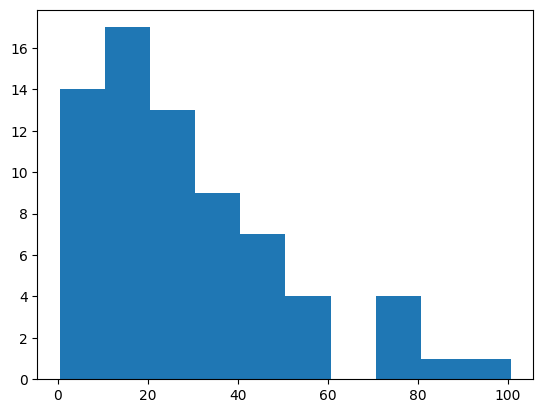

<Figure size 640x480 with 0 Axes>

In [544]:
plt.hist(sm_error)
plt.show()
plt.clf()

In [542]:
sm_error.describe()

count     70.000000
mean      28.818125
std       21.866729
min        0.463549
25%       14.377440
50%       25.230331
75%       36.603206
max      100.664229
Name: Target, dtype: float64

Ahora vamos a predecir sobre 15 días a futuro.

In [453]:
price4.head()

,Target,Training
0,74.0,91.0
1,81.0,91.0
2,77.0,92.0
3,73.0,93.0
4,67.0,94.0


In [454]:
X_future = price4['Training'][-30:-15].values.reshape(-1,1)

future_predictions = lr.predict(X_future)


future_predictions

array([122.54325197, 122.74393203, 122.84427207, 122.74393203,
       123.04495213, 122.74393203, 123.2456322 , 122.54325197,
       122.3425719 , 121.64019167, 121.13849151, 121.13849151,
       121.03815148, 120.83747141, 120.13509118])

In [455]:
print(X_future)

[[139.]
 [141.]
 [142.]
 [141.]
 [144.]
 [141.]
 [146.]
 [139.]
 [137.]
 [130.]
 [125.]
 [125.]
 [124.]
 [122.]
 [115.]]


In [553]:
sm_days_15 = abs(future_predictions - y_test2[-15:])

In [554]:
sm_days_15.describe()

count    15.000000
mean     30.703827
std      14.651755
min       3.138492
25%      18.591722
50%      29.754368
75%      41.942912
max      55.038151
Name: Target, dtype: float64

Con 15 días de entrenamiento, intentamos predecir otros 15 días, obteniendo un error medio absoluto de 30 céntimos. 

### Prophet

In [240]:
from prophet import Prophet

In [241]:
price = pd.read_csv('agrodata.csv')
weather = pd.read_csv('agroweather_data.csv')

In [242]:
df_pr = price.copy()
df_pr.head()

,Date,Price
0,02/01/2020,74
1,03/01/2020,81
2,04/01/2020,77
3,07/01/2020,73
4,08/01/2020,67


In [243]:
df_pr.columns = ['ds', 'y']
df_pr

,ds,y
0,02/01/2020,74
1,03/01/2020,81
2,04/01/2020,77
3,07/01/2020,73
4,08/01/2020,67
...,...,...
983,14/02/2024,125
984,14/02/2024,125
985,15/02/2024,124
986,16/02/2024,122


In [244]:
df_pr['ds'] = pd.to_datetime(df_pr['ds'], format = '%d/%m/%Y')

In [245]:
train_data_pr = df_pr.iloc[:len(df_pr)-48]
test_data_pr = df_pr.iloc[len(df_pr)-48:]

In [246]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

17:21:22 - cmdstanpy - INFO - Chain [1] start processing


17:21:22 - cmdstanpy - INFO - Chain [1] done processing


In [247]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
934,2024-08-01,148.106394,85.508040,196.703441,139.696289,156.688677,-7.570854,-7.570854,-7.570854,-0.604034,-0.604034,-0.604034,-6.966820,-6.966820,-6.966820,0.0,0.0,0.0,140.535540
935,2024-09-01,147.382965,94.251769,203.923677,137.139892,157.960639,1.785712,1.785712,1.785712,-3.150826,-3.150826,-3.150826,4.936538,4.936538,4.936538,0.0,0.0,0.0,149.168678
936,2024-10-01,146.682874,90.734945,207.583788,134.640879,159.485602,2.008327,2.008327,2.008327,1.884359,1.884359,1.884359,0.123968,0.123968,0.123968,0.0,0.0,0.0,148.691201
937,2024-11-01,145.959445,68.166775,178.823452,132.017654,161.166229,-22.420275,-22.420275,-22.420275,0.310723,0.310723,0.310723,-22.730998,-22.730998,-22.730998,0.0,0.0,0.0,123.539170
938,2024-12-01,145.259353,60.351920,177.646961,128.980575,162.869420,-26.579135,-26.579135,-26.579135,-3.150826,-3.150826,-3.150826,-23.428309,-23.428309,-23.428309,0.0,0.0,0.0,118.680219


In [248]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-48:]["yhat"]})

In [249]:
prophet_pred = prophet_pred.set_index("Date")

In [250]:
prophet_pred.tail()

,Pred
Date,
2024-08-01,140.535540
2024-09-01,149.168678
2024-10-01,148.691201
2024-11-01,123.539170
2024-12-01,118.680219


In [251]:
test_data_pr["Prophet_Predictions"] = prophet_pred['Pred'].values

In [252]:
test_data_pr

,ds,y,Prophet_Predictions
940,2023-12-23,114,130.854345
941,2023-12-26,118,128.419402
942,2023-12-26,118,128.976110
943,2023-12-27,118,128.524070
944,2023-12-28,114,127.786670
945,2023-12-29,109,129.580693
946,2023-12-30,112,129.052982
947,2024-01-02,121,126.982041
948,2024-01-03,125,127.944896
949,2024-01-04,134,127.927745


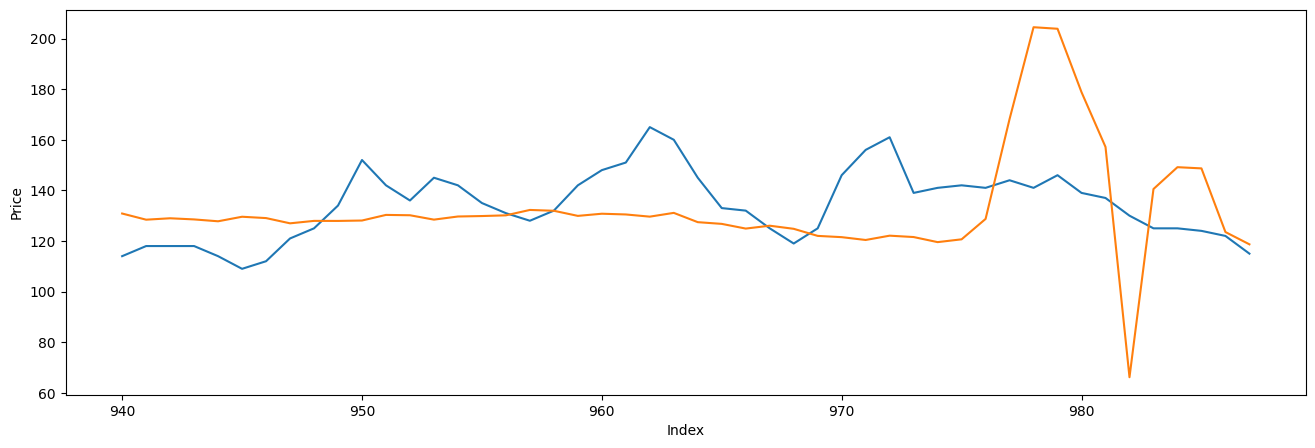

In [253]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data_pr.index, y=test_data_pr["y"])
sns.lineplot(x=test_data_pr.index, y = test_data_pr["Prophet_Predictions"])
plt.ylabel('Price')
plt.xlabel('Index')

plt.show()

In [254]:
from statsmodels.tools.eval_measures import rmse

In [478]:
import random

In [491]:
random_indices = random.sample(range(len(test_data_pr)), 15)

In [509]:
type(test_data_pr)

pandas.core.frame.DataFrame

In [492]:
random_real_values = test_data_pr['y'].iloc[random_indices]
random_predicted_values = test_data_pr['Prophet_Predictions'].iloc[random_indices]

In [493]:
prophet_rmse_error = rmse(random_real_values, random_predicted_values)
prophet_mse_error = prophet_rmse_error**2
mean_value = price['Price'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 665.9769269740559
RMSE Error: 25.806528766458612
Mean: 120.7165991902834


In [498]:
prophet_error = abs(random_real_values - random_predicted_values)
print(f"El error obtenido con Prophet es de {round(np.mean(prophet_error/100), 3)}€")

El error obtenido con Prophet es de 0.2€


In [499]:
prophet_error.describe()

count    15.000000
mean     20.036723
std      16.834488
min       1.539170
25%       6.462709
50%      17.052982
75%      24.429939
max      63.480692
dtype: float64

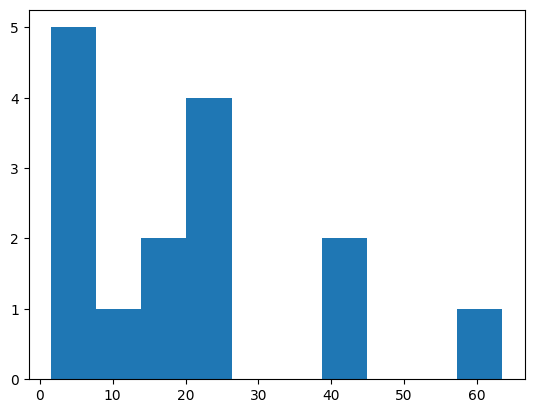

<Figure size 640x480 with 0 Axes>

In [500]:
plt.hist(prophet_error)
plt.show()
plt.clf()

### Univariable LSTM

In [258]:
import sweetviz as sv
from statsmodels.tsa.seasonal import STL

In [259]:
df_price = pd.read_csv('agrodata.csv')
df_weather = pd.read_csv('agroweather_data.csv')

In [260]:
df_price['Price'] = df_price['Price'].astype(float)
Price = df_price['Price']
Price

0       74.0
1       81.0
2       77.0
3       73.0
4       67.0
       ...  
983    125.0
984    125.0
985    124.0
986    122.0
987    115.0
Name: Price, Length: 988, dtype: float64

In [261]:
def df_to_X_y(df, window_size = 5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [426]:
train = Price[:700]
val = Price[700:850]
test = Price[850:]

In [427]:
WINDOW_SIZE = 5
X, y = df_to_X_y(train, WINDOW_SIZE)
X.shape, y.shape

((695, 5, 1), (695,))

In [428]:
X_test, y_test = df_to_X_y(test, WINDOW_SIZE)
X_test.shape, y_test.shape

((133, 5, 1), (133,))

In [429]:
X_val, y_val = df_to_X_y(val, WINDOW_SIZE)
X_val.shape, y_val.shape

((145, 5, 1), (145,))

In [430]:
X_test[0] # Estamos usando 5 días para producir una predicción de 1 día, es decir, usamos los 5 días anteriores incluyendo hoy, para realizar la predicción de mañana.9

array([[184.],
       [249.],
       [282.],
       [227.],
       [223.]])

In [431]:
y_test[0]

204.0

In [432]:
X_val, y_val = df_to_X_y(val, WINDOW_SIZE)
X_val.shape, y_val.shape

((145, 5, 1), (145,))

In [433]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from math import sqrt

In [434]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras import regularizers

In [435]:
model = Sequential()
model.add(InputLayer((5, 1)))
model.add(LSTM((64), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,667 (69.01 KB)

 Trainable params: 17,667 (69.01 KB)

 Non-trainable params: 0 (0.00 B)

In [436]:
cp = ModelCheckpoint('model1.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate = 0.001), metrics=[RootMeanSquaredError()])

In [437]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 25, verbose = 1, restore_best_weights=True)

In [438]:
model.fit(X, y, validation_data=(X_val, y_val), epochs = 250, callbacks =[early_stopping, cp])

Epoch 1/250


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 14719.7148 - root_mean_squared_error: 120.9884 - val_loss: 36838.7461 - val_root_mean_squared_error: 192.5905
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13595.5664 - root_mean_squared_error: 116.5358 - val_loss: 36378.0234 - val_root_mean_squared_error: 191.3930
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11760.4912 - root_mean_squared_error: 108.4315 - val_loss: 35297.6562 - val_root_mean_squared_error: 188.5563
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10944.1973 - root_mean_squared_error: 104.5384 - val_loss: 31591.9688 - val_root_mean_squared_error: 178.5635
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8823.3682 - root_mean_squared_error: 93.9002 - val_loss: 27074.8945 - val_root_mean_squared_error: 165.4801
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6301.3540 - root_mean_squared_error: 79.3401 - val_loss: 22556.3125 - val_root_mean_squared_error: 151.3353
Ep

In [439]:
def predict_n_steps(model, X_input, n_steps):
    # X_input es la última secuencia observada (por ejemplo, los precios de los últimos 5 días)
    predictions = []
    current_sequence = X_input.copy()
    
    for _ in range(n_steps):
        # Hacer la predicción para el próximo punto
        next_prediction = model.predict(current_sequence[np.newaxis, :])
        predictions.append(next_prediction[0, 0])
        
        # Actualizar la secuencia de entrada con la última predicción
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1] = next_prediction
        
    return predictions


last_sequence = X_test[-1]
future_steps = 15  # Pasos a predecir

predictions = predict_n_steps(model, last_sequence, future_steps)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[118.67437, 115.24846, 112.02124, 109.122665, 106.47847, 104.042984, 101.784836, 99.697266, 97.77704, 96.022354, 94.43007, 92.99642, 91.71637, 90.583405, 89.58937]


In [440]:
X_test.shape

(133, 5, 1)

In [441]:
y_test.shape

(133,)

In [442]:
comparativa = pd.DataFrame(data={'Predictions':predictions[:10], 'Actuals':y_test[:10]})
comparativa

,Predictions,Actuals
0,118.674370,204.0
1,115.248459,191.0
2,112.021240,177.0
3,109.122665,179.0
4,106.478470,186.0
5,104.042984,163.0
6,101.784836,161.0
7,99.697266,164.0
8,97.777039,171.0
9,96.022354,178.0


In [443]:
train_predictions = model.predict(X_test).flatten()
train_results = pd.DataFrame(data = {'Predictions':train_predictions, 'Actuals':y_test})
train_results

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


,Predictions,Actuals
0,222.915802,204.0
1,188.062286,191.0
2,180.246765,177.0
3,165.908432,179.0
4,171.284546,186.0
...,...,...
128,125.011070,125.0
129,120.520248,125.0
130,122.449524,124.0
131,121.226761,122.0


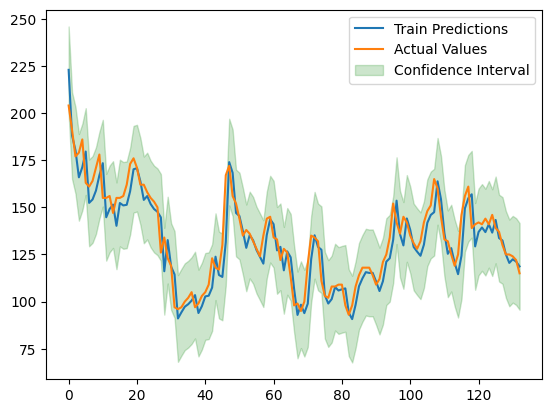

<Figure size 640x480 with 0 Axes>

In [444]:
plt.plot(train_results['Predictions'])
plt.plot(train_results['Actuals'])
# Suponiendo que tienes las predicciones y los intervalos de confianza en train_results
upper_bound = train_results['Predictions'] + 23
lower_bound = train_results['Predictions'] - 23

plt.fill_between(train_results.index, lower_bound, upper_bound, color='green', alpha=0.2)
plt.legend(['Train Predictions', 'Actual Values', 'Confidence Interval'])
plt.show()
plt.clf()

In [445]:
mae = tf.keras.losses.MeanAbsoluteError()

In [446]:
from sklearn.metrics import mean_absolute_error

In [447]:
result = mean_absolute_error(train_results['Actuals'], train_results['Predictions'])
print(f"El error obtenido con LSTM es de {round((result / 100), 2)}€")

El error obtenido con LSTM es de 0.07€


Tenemos un error medio absoluto de 11 céntimos cuando queremos predecir el día siguiente con una ventana de tiempo (número de días de referencia) de 5 días.

In [448]:
lstm_error = abs(comparativa['Actuals'] - comparativa['Predictions'])
lstm_error.describe() # Aquí podemos ver la distribución de nuestra pérdida a la hora de hacer la predicción.

count    10.000000
mean     71.313032
std       9.375930
min      58.957016
25%      64.471741
50%      71.550148
75%      78.579033
max      85.325630
dtype: float64

<function matplotlib.pyplot.clf() -> 'None'>

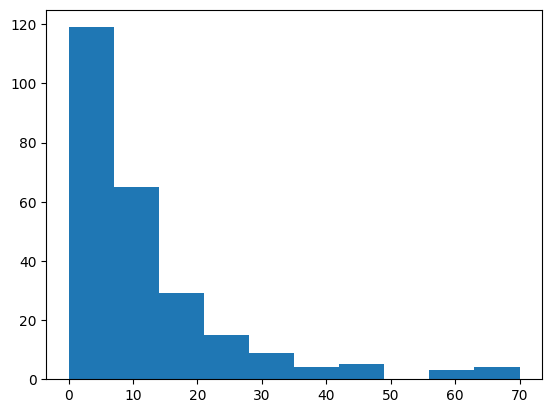

In [354]:
plt.hist(lstm_error)
plt.plot()
plt.clf

In [297]:
value2 = abs(comparativa['Actuals'] - comparativa['Predictions'])
value2.describe() 

count    10.000000
mean     70.879372
std      22.737464
min      30.364578
25%      55.555784
50%      80.909554
75%      89.017435
max      91.142494
dtype: float64

Tenemos una media de 70 céntimos de error cuando queremos predecir 15 días hacia adelante utilizando una ventana de tiempo (referencia de precios) de los últimos 5 días.

### Multivariable Random Forest

In [298]:
price3 = pd.read_csv('agrodata.csv')
price3.head()

,Date,Price
0,02/01/2020,74
1,03/01/2020,81
2,04/01/2020,77
3,07/01/2020,73
4,08/01/2020,67


In [299]:
price3['Date'] = price3['Date'].astype(str)

In [300]:
price3['Date'] = pd.to_datetime(price3['Date'], format = "%d/%m/%Y")

In [301]:
price3.head()

,Date,Price
0,2020-01-02,74
1,2020-01-03,81
2,2020-01-04,77
3,2020-01-07,73
4,2020-01-08,67


In [302]:
price3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    988 non-null    datetime64[ns]
 1   Price   988 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.6 KB


In [303]:
weather3 = pd.read_csv('agroweather_data.csv')
weather3.head()

,Unnamed: 0,fecha,dia,tempMedia,tempMax,horMinTempMax,tempMin,horMinTempMin,humedadMedia,humedadMax,...,velViento,dirViento,velVientoMax,horMinVelMax,dirVientoVelMax,radiacion,precipitacion,bateria,fechaUtlMod,et0
0,0,2020-01-01,1,11.28,16.30,13:26,8.07,06:28,76.80,88.3,...,1.742,346.500,4.606,02:20,347.600,10.990,0.0,12.88,2020-01-03T07:45:00.000+0100,1.343917
1,1,2020-01-02,2,12.19,15.32,12:32,10.39,17:56,75.70,85.6,...,1.473,359.600,3.998,05:23,0.000,7.060,0.0,12.87,2020-01-04T07:45:00.000+0100,1.199930
2,2,2020-01-03,3,11.77,16.18,13:36,7.94,06:58,77.80,86.8,...,2.111,326.300,4.302,03:35,337.000,9.860,0.0,12.86,2020-01-05T07:45:00.000+0100,1.397516
3,3,2020-01-04,4,12.79,16.79,11:40,9.00,04:20,72.60,86.2,...,1.699,40.730,4.439,01:56,0.095,6.104,0.0,12.87,2020-01-06T07:45:00.000+0100,1.374706
4,4,2020-01-05,5,11.85,17.18,11:36,8.60,00:00,69.21,82.5,...,1.863,4.554,5.184,06:27,326.400,11.050,0.0,12.85,2020-01-07T07:45:00.000+0100,1.695512


In [304]:
weather3.drop(['Unnamed: 0', 'bateria', 'fechaUtlMod', 'et0'], axis = 1, inplace =True)
weather3.head()

,fecha,dia,tempMedia,tempMax,horMinTempMax,tempMin,horMinTempMin,humedadMedia,humedadMax,horMinHumMax,humedadMin,horMinHumMin,velViento,dirViento,velVientoMax,horMinVelMax,dirVientoVelMax,radiacion,precipitacion
0,2020-01-01,1,11.28,16.30,13:26,8.07,06:28,76.80,88.3,19:04,61.53,10:42,1.742,346.500,4.606,02:20,347.600,10.990,0.0
1,2020-01-02,2,12.19,15.32,12:32,10.39,17:56,75.70,85.6,18:30,62.73,12:30,1.473,359.600,3.998,05:23,0.000,7.060,0.0
2,2020-01-03,3,11.77,16.18,13:36,7.94,06:58,77.80,86.8,20:26,64.39,12:38,2.111,326.300,4.302,03:35,337.000,9.860,0.0
3,2020-01-04,4,12.79,16.79,11:40,9.00,04:20,72.60,86.2,04:26,58.06,11:32,1.699,40.730,4.439,01:56,0.095,6.104,0.0
4,2020-01-05,5,11.85,17.18,11:36,8.60,00:00,69.21,82.5,18:16,49.78,11:30,1.863,4.554,5.184,06:27,326.400,11.050,0.0


In [305]:
weather3['fecha'] = pd.to_datetime(weather['fecha'])
weather3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fecha            1505 non-null   datetime64[ns]
 1   dia              1505 non-null   int64         
 2   tempMedia        1505 non-null   float64       
 3   tempMax          1505 non-null   float64       
 4   horMinTempMax    1505 non-null   object        
 5   tempMin          1505 non-null   float64       
 6   horMinTempMin    1505 non-null   object        
 7   humedadMedia     1505 non-null   float64       
 8   humedadMax       1505 non-null   float64       
 9   horMinHumMax     1505 non-null   object        
 10  humedadMin       1505 non-null   float64       
 11  horMinHumMin     1505 non-null   object        
 12  velViento        1505 non-null   float64       
 13  dirViento        1505 non-null   float64       
 14  velVientoMax     1505 non-null   float64

In [306]:
weather3.describe()

,fecha,dia,tempMedia,tempMax,tempMin,humedadMedia,humedadMax,humedadMin,velViento,dirViento,velVientoMax,dirVientoVelMax,radiacion,precipitacion
count,1505,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000
mean,2022-01-22 00:00:00,178.429236,18.653235,22.989236,14.926671,66.754332,84.181595,46.388957,1.532124,222.250582,5.375778,207.248139,17.604991,0.547447
min,2020-01-01 00:00:00,1.000000,8.360000,10.800000,4.808000,24.140000,43.590000,7.880000,0.367000,0.142000,1.715000,0.000000,0.931000,0.000000
25%,2021-01-11 00:00:00,84.000000,14.640000,18.990000,10.930000,60.670000,79.900000,37.630000,0.974000,158.400000,3.900000,145.800000,11.930000,0.000000
50%,2022-01-22 00:00:00,178.000000,17.820000,22.250000,14.130000,68.040000,84.700000,46.160000,1.326000,255.200000,4.851000,243.800000,17.170000,0.000000
75%,2023-02-02 00:00:00,272.000000,22.550000,26.950000,18.930000,73.500000,90.700000,55.290000,1.807000,301.100000,6.262000,266.000000,23.930000,0.000000
max,2024-02-13 00:00:00,366.000000,29.290000,38.010000,25.570000,99.600000,100.000000,95.200000,7.050000,360.000000,15.340000,354.700000,29.760000,49.200000
std,NaN,107.410009,4.843304,4.876072,4.872473,10.343487,9.586960,12.199913,0.852002,103.309082,2.124141,101.192443,6.849749,2.952161


In [307]:
final2 = price3.merge(weather3, how = 'inner', left_on = 'Date', right_on = 'fecha')
final2.head()

,Date,Price,fecha,dia,tempMedia,tempMax,horMinTempMax,tempMin,horMinTempMin,humedadMedia,...,horMinHumMax,humedadMin,horMinHumMin,velViento,dirViento,velVientoMax,horMinVelMax,dirVientoVelMax,radiacion,precipitacion
0,2020-01-02,74,2020-01-02,2,12.19,15.32,12:32,10.390,17:56,75.7,...,18:30,62.73,12:30,1.473,359.600,3.998,05:23,0.000,7.060,0.0
1,2020-01-03,81,2020-01-03,3,11.77,16.18,13:36,7.940,06:58,77.8,...,20:26,64.39,12:38,2.111,326.300,4.302,03:35,337.000,9.860,0.0
2,2020-01-04,77,2020-01-04,4,12.79,16.79,11:40,9.000,04:20,72.6,...,04:26,58.06,11:32,1.699,40.730,4.439,01:56,0.095,6.104,0.0
3,2020-01-07,73,2020-01-07,7,10.82,16.17,13:32,6.878,06:50,71.7,...,20:34,48.00,09:38,1.550,340.400,4.449,03:38,0.095,11.280,0.0
4,2020-01-08,67,2020-01-08,8,11.36,16.24,12:46,7.280,06:08,74.0,...,19:24,57.02,09:40,1.056,0.142,3.508,08:29,354.700,10.830,0.0


In [308]:
final2['Date'] = final2['Date'].astype(str)

In [309]:
final2['Dia'] = final2['Date'].str.split('-').str[2]
final2['Mes'] = final2['Date'].str.split('-').str[1]
final2['Año'] = final2['Date'].str.split('-').str[0]

In [310]:
final2.drop(['Date', 'fecha'], axis = 1, inplace = True)
final2.head()

,Price,dia,tempMedia,tempMax,horMinTempMax,tempMin,horMinTempMin,humedadMedia,humedadMax,horMinHumMax,...,velViento,dirViento,velVientoMax,horMinVelMax,dirVientoVelMax,radiacion,precipitacion,Dia,Mes,Año
0,74,2,12.19,15.32,12:32,10.390,17:56,75.7,85.6,18:30,...,1.473,359.600,3.998,05:23,0.000,7.060,0.0,02,01,2020
1,81,3,11.77,16.18,13:36,7.940,06:58,77.8,86.8,20:26,...,2.111,326.300,4.302,03:35,337.000,9.860,0.0,03,01,2020
2,77,4,12.79,16.79,11:40,9.000,04:20,72.6,86.2,04:26,...,1.699,40.730,4.439,01:56,0.095,6.104,0.0,04,01,2020
3,73,7,10.82,16.17,13:32,6.878,06:50,71.7,86.9,20:34,...,1.550,340.400,4.449,03:38,0.095,11.280,0.0,07,01,2020
4,67,8,11.36,16.24,12:46,7.280,06:08,74.0,90.0,19:24,...,1.056,0.142,3.508,08:29,354.700,10.830,0.0,08,01,2020


In [311]:
def custom_round(time_str):
    # Asegurarse de que time_str es una cadena
    time_str = str(time_str)
    
    # Verificar si time_str contiene ':'
    if ':' in time_str:
        # Dividir en horas y minutos
        hour, minute = map(int, time_str.split(':'))
    else:
        # Si no contiene ':', asumir que es solo una hora
        hour = int(time_str)
        minute = 0  # No hay minutos especificados
    
    # Redondear la hora basándose en el valor de los minutos
    return hour + (minute >= 30)

In [312]:
final2.isnull().sum()

Price              0
dia                0
tempMedia          0
tempMax            0
horMinTempMax      0
tempMin            0
horMinTempMin      0
humedadMedia       0
humedadMax         0
horMinHumMax       0
humedadMin         0
horMinHumMin       0
velViento          0
dirViento          0
velVientoMax       0
horMinVelMax       0
dirVientoVelMax    0
radiacion          0
precipitacion      0
Dia                0
Mes                0
Año                0
dtype: int64

In [313]:
final2['horMinTempMax'] = final2['horMinTempMax'].astype(str).apply(custom_round)
final2['horMinTempMin'] = final2['horMinTempMin'].astype(str).apply(custom_round)
final2['horMinHumMin'] = final2['horMinHumMin'].astype(str).apply(custom_round)
final2['horMinVelMax'] = final2['horMinVelMax'].astype(str).apply(custom_round)
final2['horMinVelMax'] = final2['horMinVelMax'].astype(str).apply(custom_round)
final2['horMinHumMax'] = final2['horMinHumMax'].astype(str).apply(custom_round)

In [314]:
final2.drop(['Dia', 'Mes', 'Año'], axis = 1, inplace =True)
final2.head()

,Price,dia,tempMedia,tempMax,horMinTempMax,tempMin,horMinTempMin,humedadMedia,humedadMax,horMinHumMax,humedadMin,horMinHumMin,velViento,dirViento,velVientoMax,horMinVelMax,dirVientoVelMax,radiacion,precipitacion
0,74,2,12.19,15.32,13,10.390,18,75.7,85.6,19,62.73,13,1.473,359.600,3.998,5,0.000,7.060,0.0
1,81,3,11.77,16.18,14,7.940,7,77.8,86.8,20,64.39,13,2.111,326.300,4.302,4,337.000,9.860,0.0
2,77,4,12.79,16.79,12,9.000,4,72.6,86.2,4,58.06,12,1.699,40.730,4.439,2,0.095,6.104,0.0
3,73,7,10.82,16.17,14,6.878,7,71.7,86.9,21,48.00,10,1.550,340.400,4.449,4,0.095,11.280,0.0
4,67,8,11.36,16.24,13,7.280,6,74.0,90.0,19,57.02,10,1.056,0.142,3.508,8,354.700,10.830,0.0


In [315]:
from sklearn.model_selection import train_test_split

In [316]:
from sklearn.preprocessing import MinMaxScaler

In [317]:
scaler = MinMaxScaler()

In [318]:
X = final2.drop('Price', axis = 1)
y = final2['Price']

In [319]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2, random_state=123)

In [320]:
X_train3.shape, y_train3.shape

((786, 18), (786,))

In [321]:
scaler.fit_transform(X_train3)
scaler.transform(X_test3)

array([[0.12362637, 0.15719882, 0.22278057, ..., 0.99859036, 0.54410688,
        0.        ],
       [0.37362637, 0.49118511, 0.50460637, ..., 0.39159853, 0.61875196,
        0.        ],
       [0.90659341, 0.30117532, 0.34840871, ..., 0.97208909, 0.28040741,
        0.        ],
       ...,
       [0.02747253, 0.04407444, 0.13651591, ..., 0.69664505, 0.38365482,
        0.        ],
       [0.76373626, 0.64985309, 0.64656616, ..., 0.70764026, 0.51794621,
        0.        ],
       [0.6456044 , 0.86238981, 0.76549414, ..., 0.45644206, 0.74362552,
        0.        ]])

In [462]:
X_train3[:15]

,dia,tempMedia,tempMax,horMinTempMax,tempMin,horMinTempMin,humedadMedia,humedadMax,horMinHumMax,humedadMin,horMinHumMin,velViento,dirViento,velVientoMax,horMinVelMax,dirVientoVelMax,radiacion,precipitacion
656,346,17.43,20.05,10,13.73,5,73.20,88.6,23,54.12,0,3.051,276.700,8.170,17,266.3,10.17,0.0
368,230,26.06,29.15,15,23.71,5,75.10,91.1,5,56.74,15,1.011,216.300,3.058,13,181.2,19.87,0.4
260,359,13.82,18.25,14,11.20,6,66.34,79.2,18,55.41,8,1.095,2.761,3.753,8,336.4,10.72,0.0
91,127,19.42,24.02,16,14.46,6,83.80,100.0,4,54.76,18,0.531,168.800,2.205,12,173.9,27.14,0.0
170,254,23.12,27.15,13,19.98,4,64.41,74.6,22,54.55,15,0.584,277.100,3.077,0,348.7,22.64,0.0
769,124,19.22,23.17,13,14.93,5,70.60,91.8,23,45.19,7,0.952,247.800,3.214,14,243.2,22.61,0.0
90,126,19.46,23.57,14,15.99,24,83.90,98.4,7,61.06,4,1.027,228.700,3.802,17,261.4,25.97,0.0
75,91,14.76,17.78,14,12.06,5,84.60,98.0,24,66.80,10,1.100,327.200,4.782,5,347.8,12.27,16.8
338,187,22.33,28.03,16,18.66,5,70.20,96.0,6,41.35,16,2.609,251.500,7.420,18,240.9,28.15,0.0
953,10,12.59,17.27,11,9.81,8,84.20,97.2,19,66.54,11,1.176,355.500,4.106,8,333.7,10.32,0.0


In [323]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [324]:
rf = RandomForestRegressor(n_estimators = 10000, min_samples_leaf=0.2)

In [555]:
rf.fit(X_train3[:15], y_train3[:15])
predictions3 = rf.predict(X_test3[:15])

In [556]:
result = mean_absolute_error(predictions3, y_test3[:15])
result

36.76962643674827

In [468]:
rforest_error = abs(y_test3[:15] - predictions3)
rforest_error.describe()

count    15.000000
mean     36.898265
std      28.105583
min       0.077551
25%      17.613304
50%      29.502100
75%      52.080292
max      86.571984
Name: Price, dtype: float64

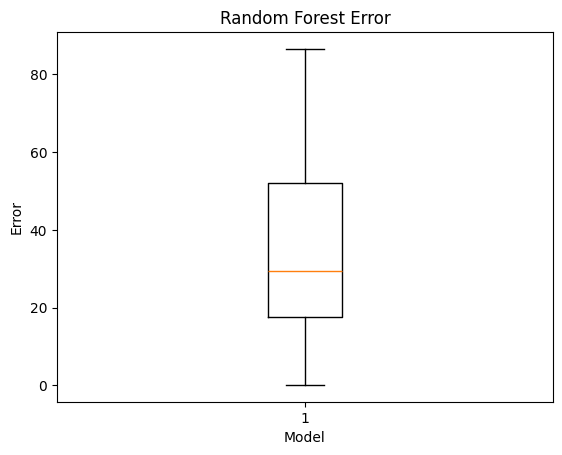

<Figure size 640x480 with 0 Axes>

In [475]:
plt.boxplot(rforest_error)
plt.title('Random Forest Error')
plt.xlabel('Model')
plt.ylabel('Error')
plt.show()
plt.clf()

In [361]:
rforest_error.shape, lstm_error.shape, prophet_error.shape, sm_error.shape

((197,), (253,), (48,), (70,))

In [408]:
lstm_error.describe()

count    253.000000
mean      12.051738
std       13.110813
min        0.004883
25%        3.564407
50%        7.970482
75%       14.664368
max       69.975128
dtype: float64

### Model Comparison

In [501]:
errors = [rforest_error[:40], lstm_error[:40], prophet_error[:40], sm_error[:40]]
models = ['Random Forest', 'LSTM', 'Prophet', 'Simple Model']

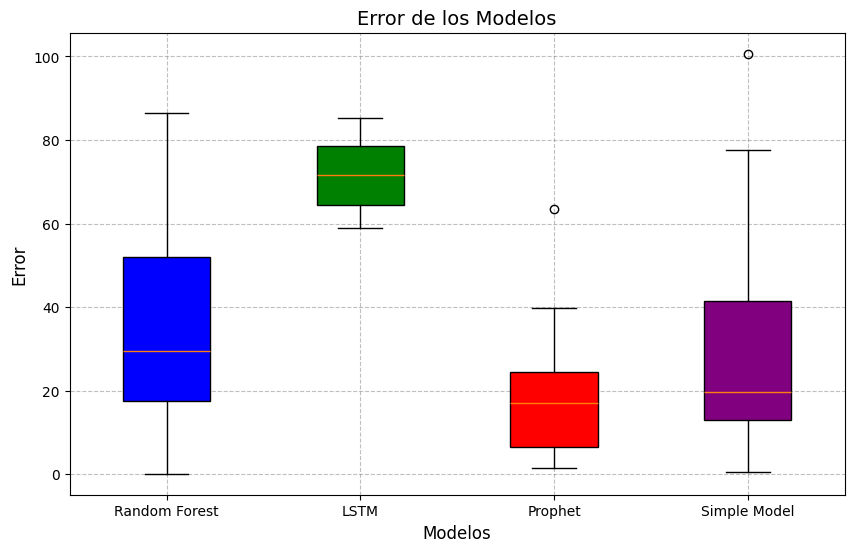

In [502]:
import matplotlib.pyplot as plt

# Asume que 'errores' es una lista de listas, con los errores para cada modelo
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura

# Crea el boxplot con colores personalizados
box = plt.boxplot(errors, patch_artist=True, labels=models)

# Configura los colores
colors = ['blue', 'green', 'red', 'purple']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Elimina la leyenda si ya etiquetaste las cajas con los nombres de los modelos
# plt.legend()  # Si decides mantener la leyenda, configúrala adecuadamente

# Añade la rejilla
plt.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)

# Añade etiquetas y título con un tamaño de fuente más grande para mejor legibilidad
plt.xlabel('Modelos', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Error de los Modelos', fontsize=14)

# Muestra los valores de los ejes y ajusta el rango si es necesario
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Muestra la gráfica
plt.show()


plt.show()